In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the random seed for reproducibility
np.random.seed(1)

# Define the number of rows and columns
num_rows = 5

num_columns = 2

# Create a DataFrame with random data
random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])

print(random_data)

rd = random_data

Column1 = 'Column_1'
Column2 = 'Column_2'

rd[Column1] = (rd[Column1]) + rd.index * np.sin(rd[Column1]) + rd.index
rd[Column2] = (rd[Column2]) + rd.index * np.cos(rd[Column2]) + rd.index

print(rd)

   Column_1  Column_2
0  0.417022  0.720324
1  0.000114  0.302333
2  0.146756  0.092339
3  0.186260  0.345561
4  0.396767  0.538817
   Column_1  Column_2
0  0.417022  0.720324
1  1.000229  2.256977
2  2.439215  4.083818
3  3.741815  6.168218
4  5.942523  7.972082


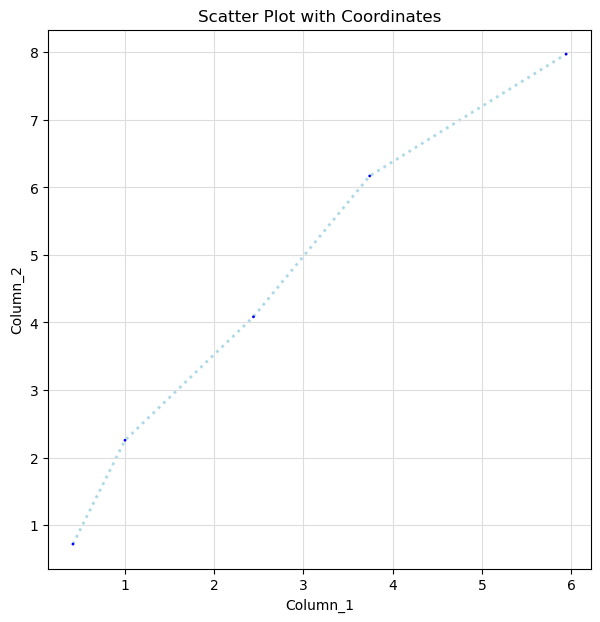

In [480]:
def create_original_graph(dataset):

    color = 'blue'
    linecolor = "lightblue"
    plt.figure(figsize=(7, 7))
    
    plt.plot(dataset[Column1], dataset[Column2], color=linecolor, linestyle=':', linewidth=2, label='Trend Line', zorder=1)
    
    plt.scatter(dataset[Column1], dataset[Column2], s=1, zorder=3, facecolors='none', edgecolors=color)

    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
    
    plt.xlabel(Column1)
    plt.ylabel(Column2)
    plt.title('Scatter Plot with Coordinates')


create_original_graph(rd)
plt.show()

In [481]:
def find_sample_means(samples, dataset):
    n = samples
    
    x_sample_sum = 0
    y_sample_sum = 0
    
    for row in range(n):
        y_sample_sum += dataset[Column2][row]
        x_sample_sum += dataset[Column1][row]
    
    y_sample_mean = y_sample_sum / n
    x_sample_mean = x_sample_sum / n
    
    return x_sample_mean, y_sample_mean

sample_means = find_sample_means(num_rows, rd)
x_sample_mean, y_sample_mean = sample_means
print(f"X samples Mean: {x_sample_mean} \nY samples Mean: {y_sample_mean}")

X samples Mean: 2.70816095869347 
Y samples Mean: 4.2402840196912575


In [482]:
def find_slope(x_mean, y_mean, samples, dataset):
    n = samples
    covariance = 0
    variance = 0

    for row in range(n):
        
        xi = dataset[Column1][row]
        yi = dataset[Column2][row]
        
        covariance += (xi - x_mean) * (yi - y_mean)
        
        variance += (xi - x_mean) ** 2

    B1 = covariance / variance

    return B1

B1 = find_slope(x_sample_mean, y_sample_mean, num_rows, rd)

print(f"'B1', or the Slope: {B1}")

'B1', or the Slope: 1.2928302257537836


In [483]:
def find_intercept(x_mean, y_mean, slope):
    
    B0 = y_mean - (slope * x_mean)

    return B0

B0_rss_method = find_intercept(x_sample_mean, y_sample_mean, B1)

print(f"'B0', or the Y-Intercept: {B0_rss_method}")

'B0', or the Y-Intercept: 0.7390916760859958


In [484]:
def find_intercept_gradient_descent(slope, samples, dataset):
    B1 = slope
    n = samples
    
    new_intercept = 0
    learning_rate = 0.1 / num_rows
    rss_derivative_sum = 0
    min_step_size = 0.001 / num_rows
    step_size = 1
    max_iteration = num_rows * 10
    iteration = 0
    
    rss_list = []
    intercept_list = []
    derivative_rss_list = []
    
    while (np.abs(step_size) > min_step_size) and (iteration <= max_iteration):
        rss_derivative_sum = 0
        RSS = 0
        squared_errors = []
        for row in range(n):
            xi = dataset[Column1][row]
            yi = dataset[Column2][row]
            
            new_rss_derivative = -2 * (yi - (new_intercept + (slope * xi)))
            rss_derivative_sum += new_rss_derivative

            squared_error = (yi - (new_intercept+(slope*xi))) ** 2
            RSS += squared_error
            squared_errors.append(squared_error)
            
        rss_list.append(RSS)
        derivative_rss_list.append(rss_derivative_sum)
        intercept_list.append(new_intercept)
        step_size = rss_derivative_sum * learning_rate
        new_intercept = new_intercept - step_size
        iteration += 1
        
    abs_derivative_rss_list = [abs(value) for value in derivative_rss_list]
    min_rss = min(abs_derivative_rss_list)
    min_rss_index = abs_derivative_rss_list.index(min_rss)
    optimal_intercept = [intercept_list[min_rss_index], min_rss_index]
    
    return optimal_intercept, derivative_rss_list, abs_derivative_rss_list, intercept_list, rss_list
    
optimal_intercept, derivative_rss_list, abs_derivative_rss_list, intercept_list, rss_list = find_intercept_gradient_descent(B1, num_rows, rd)
B0 = optimal_intercept[0]
print(f"Optimal intercept: {optimal_intercept[0]}, found at iteration: {optimal_intercept[1]}")
print(B0, derivative_rss_list, intercept_list)

Optimal intercept: 0.7381767249074671, found at iteration: 30
0.7381767249074671 [-7.390916760859964, -5.912733408687973, -4.730186726950376, -3.7841493815603, -3.027319505248241, -2.421855604198594, -1.937484483358877, -1.5499875866871013, -1.2399900693496806, -0.9919920554797461, -0.7935936443837941, -0.6348749155070375, -0.5078999324056286, -0.4063199459245006, -0.3250559567396014, -0.2600447653916842, -0.20803581231334722, -0.1664286498506764, -0.13314291988054028, -0.10651433590443493, -0.0852114687235479, -0.06816917497883801, -0.05453533998306992, -0.04362827198645447, -0.034902617589164686, -0.02792209407132895, -0.022337675257065426, -0.017870140205652918, -0.014296112164522201, -0.011436889731615496, -0.009149511785291553] [0, 0.14781833521719928, 0.26607300339095874, 0.36067673792996624, 0.43635972556117225, 0.49690611566613707, 0.5453432277501089, 0.5840929174172864, 0.6150926691510284, 0.639892470538022, 0.6597323116476169, 0.6756041845352928, 0.6883016828454336, 0.6984596

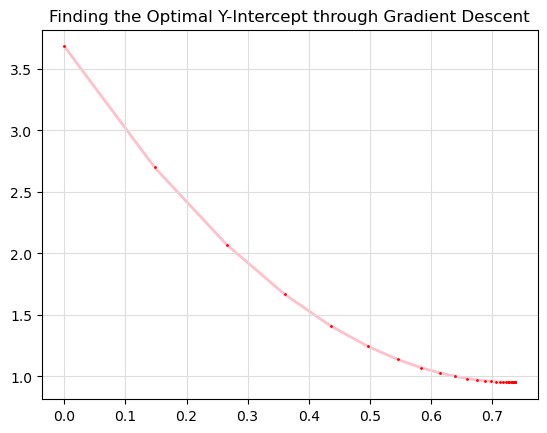

In [485]:
plt.plot(intercept_list, rss_list, color='pink', linestyle='-', linewidth=2, label='Trend Line', zorder=1)
plt.scatter(intercept_list, rss_list, s=1, zorder=3, color='red')

plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
plt.title('Finding the Optimal Y-Intercept through Gradient Descent')

plt.show()

In [486]:
def find_residual_sum_of_squares(intercept, slope, samples, dataset):
    
    RSS = 0
    squared_errors = []
    
    for row in range(samples):
        
        xi = dataset[Column1][row]
        yi = dataset[Column2][row]
        
        squared_error = (yi - (intercept+(slope*xi))) ** 2

        RSS += squared_error
        squared_errors.append(squared_error)
        MSE = RSS / samples
    return RSS, MSE, squared_errors

RSS_result = find_residual_sum_of_squares(B0, B1, num_rows, rd)
RSS, MSE, squared_errors = RSS_result

print(f"Residiual Sum of Squares: {RSS} \n\nMSE: {MSE} \n\nList of Squared Errors: {squared_errors}")

Residiual Sum of Squares: 0.9505489807240323 

MSE: 0.19010979614480644 

List of Squared Errors: [0.3102388448025481, 0.050928960087244596, 0.03692175001195743, 0.35106672168438346, 0.20139270413789864]


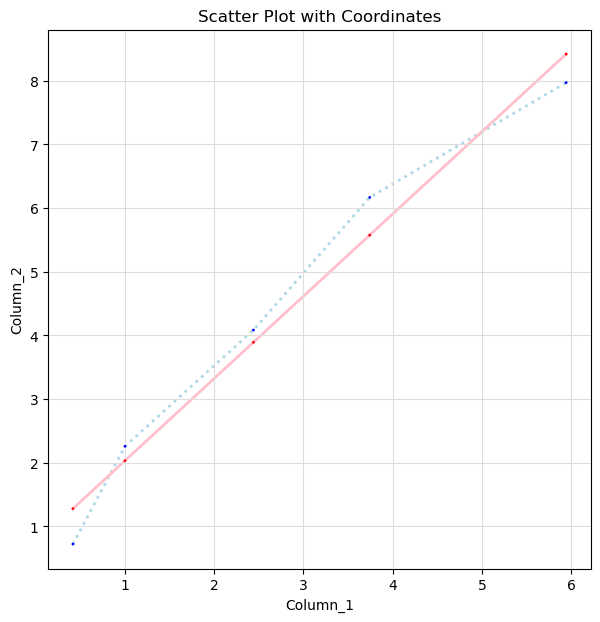

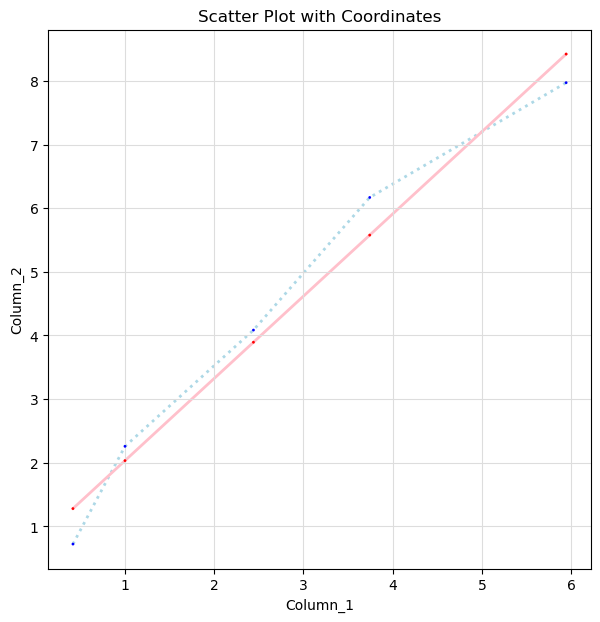

In [487]:
create_original_graph(rd)

LR_color = 'red'
LR_linecolor = 'pink'

def create_linear_regression_lines(intercept, slope, dataset):
    x_linear_regression = dataset[Column1]
    y_linear_regression = intercept + (slope * x_linear_regression)
    plt.plot(x_linear_regression, y_linear_regression, color=LR_linecolor, linestyle='-', linewidth=2, label='Trend Line', zorder=1)
    plt.scatter(x_linear_regression, y_linear_regression, s=1, zorder=3, facecolors='none', edgecolors=LR_color, label='Regression Line')

    return x_linear_regression, y_linear_regression

x_linear_regression, y_linear_regression = create_linear_regression_lines(B0, B1, rd)

plt.show()

create_original_graph(rd)
x_linear_regression, y_linear_regression = create_linear_regression_lines(B0_rss_method, B1, rd)
plt.show()

In [488]:
def predict_next_point(intercept, slope, samples, columns, dataset):
    
    new_num_rows = samples + 1

    # Creating a new data frame with the same seed
    new_rd = pd.DataFrame(np.random.rand(new_num_rows, columns), 
                            columns=[f'Column_{i+1}' for i in range(columns)])

    new_rd[Column1] = (new_rd[Column1] + new_rd.index)
    new_rd[Column2] = (new_rd[Column2] + new_rd.index)

    
    true_Y = round(new_rd.at[len(new_rd) - 1, Column2], 4)

    test_X = round(new_rd.at[len(new_rd) - 1, Column1], 4)
    
    test_Y = round(intercept + slope * test_X, 4)

    residual = round(true_Y - test_Y, 4)
    
    return test_Y, true_Y, test_X, residual


    
test_Y, true_Y, test_X, residual = predict_next_point(B0, B1, num_rows, num_columns, rd)
print(f"At X = {test_X}, the True Y-Value is: {true_Y} \n\nAt X = {test_X}, the Predicted Y-Value is: {test_Y} \n\nAt X = {test_X} the Residual is {residual}")

At X = 5.8007, the True Y-Value is: 5.9683 

At X = 5.8007, the Predicted Y-Value is: 8.2375 

At X = 5.8007 the Residual is -2.2692


In [489]:
def find_sample_SD(x_mean, samples, dataset):
    temp = 0
    for row in range(samples):
        xi = row
        temp += (xi - x_mean) ** 2
    standard_deviation = np.sqrt(temp / (samples-1))
    return standard_deviation
s_standard_deviation = find_sample_SD(x_sample_mean, num_rows, rd)
print(f"The samples Standard Deviation is: {round(s_standard_deviation, 4)}")

The samples Standard Deviation is: 1.7683


In [490]:
def find_sample_SE(sd, samples):
    standard_error = (sd ** 2) / samples
    return standard_error
s_standard_error = find_sample_SE(s_standard_deviation, num_rows)
print(f"The Standard Error is: {round(s_standard_error, 4)}")

The Standard Error is: 0.6254


In [491]:
def find_RSE(samples):
    RSE = np.sqrt(RSS / (samples-2))
    return RSE
RSE = find_RSE(num_rows)
print(f"The Residual Standard Error is: {round(RSE, 4)}")

The Residual Standard Error is: 0.5629


In [492]:
def find_SE_of_slope_and_intercept(x_mean, rse, samples, dataset):
    
    temp1 = 0
    for row in range(samples):
        temp1 += (dataset[Column1][row] - x_mean) ** 2

    temp2 = (1 / samples) + (x_mean / temp1)
    
    SE_B0_Sq = RSE * temp2
    SE_B1_Sq = RSE / temp1

    return SE_B0_Sq, SE_B1_Sq

SE_B0_Sq, SE_B1_Sq = find_SE_of_slope_and_intercept(x_sample_mean, RSE, num_rows, rd)

print(f"The Standard Error of B0 Squared is: {round(SE_B0_Sq, 4)}\nThe Standard error of B1 Squared is: {round(SE_B1_Sq, 10)}")

The Standard Error of B0 Squared is: 0.1897
The Standard error of B1 Squared is: 0.0284746884


In [493]:
def find_confidence_intervals(intercept, slope, SE_intercept, SE_slope):
    CI_95_B0 = []
    CI_95_B1 = []

    lower_Limit = -2
    upper_Limit = 2

    CI_95_B0.append(round(intercept + (lower_Limit * SE_intercept), 4))
    CI_95_B0.append(round(intercept + (upper_Limit * SE_intercept), 4))
    CI_95_B1.append(round(slope + (lower_Limit * SE_slope), 4))
    CI_95_B1.append(round(slope + (upper_Limit * SE_slope), 4))

    confidence_intervals = [CI_95_B0, CI_95_B1]
    return confidence_intervals
confidence_Intervals = find_confidence_intervals(B0, B1, SE_B0_Sq, SE_B1_Sq)
print(confidence_Intervals)
print(f"\nAt a 95% Confidence Interval, the Y-Intercept lies in the range: {confidence_Intervals[0]}")
print(f"\nAt a 95% Confidence Interval, the Slope lies in the range: {confidence_Intervals[1]}")

[[0.3588, 1.1176], [1.2359, 1.3498]]

At a 95% Confidence Interval, the Y-Intercept lies in the range: [0.3588, 1.1176]

At a 95% Confidence Interval, the Slope lies in the range: [1.2359, 1.3498]


In [494]:
def find_t_stat(slope, SE_slope_sq):
    SE_slope = np.sqrt(SE_slope_sq)
    t_stat = slope / SE_slope
    return t_stat

t_stat = round(find_t_stat(B1, SE_B1_Sq), 4)
print(f"The t-statistic is {t_stat}")

The t-statistic is 7.6615


In [495]:
def find_total_sum_of_squares(y_mean, samples, dataset):
    TSS = 0
    for row in range(samples):
        TSS += (dataset[Column2][row] - y_mean) ** 2
    return TSS
TSS = round(find_total_sum_of_squares(y_sample_mean, num_rows, rd), 4)
print(f"The Total Sum of Squares is {TSS}")

def find_r_squared(tss, rss):
    R2 = (tss - rss) / tss
    return R2
R2 = round(find_r_squared(TSS, RSS), 4)
print(f"The R-Squared Value is {R2}")

The Total Sum of Squares is 33.9914
The R-Squared Value is 0.972


In [496]:
def calculate_p_value(t_statistic, df, two_tailed=True):
    if two_tailed:
        p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
    else:
        p_value = 1 - stats.t.cdf(t_statistic, df)
    return p_value
    
df = num_rows-2
p_value = calculate_p_value(t_stat, df)
print(f"P-value: {p_value}")

P-value: 0.0046186516257500365
